## Statistic Analysis of the Stroop Effect 
#### Introduction
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='RED'>RED</font>, <font color='BLUE'>BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='RED'>PURPLE</font>, <font color='BLUE'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

(1) What is the independent variable? What is the dependent variable?

Independent variable refers to a variable whose variation does not depend on that of another, it is usually denoted by x. Independent variable here: congruent or incongruent condition
Dependent variable is the variable that changes in response to the independent variable. Dependent variable here:  time to complete the test

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### Determine a null and alternate hypothesis
* Null Hypothsis,  **$H_{0}$** - No change in time between two reading tasks (congruent or incongruent)
* Alternate Hypothesis, **$H_{a}$** - incongruent task take more time than congruent
*               **$H_{0}$**: **$μ _{i}$** = **$μ _{c}$**    (**$μ _{i}$** - population mean of incongruent values, **$μ _{c}$** - population mean of congruent values)
*               **$H_{a}$** : **$μ _{i}$** > **$μ _{c}$**  

* **statistical test** : Dependent t-test (two tailed). The dependent t-test can look for "differences" between means when participants are measured on the same dependent variable under two different conditions. 


* We need to compare the means of two related groups to determine the statistically significant difference between two means.
We are assuming distributions are nearly normal and we are comparing 2 dependent samples of data
our sample size less than 30 and we don't know the population standard deviations


#### Collect sample data 
(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [75]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

In [76]:
df=pd.read_csv('stroopdata.csv')
df.describe()


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [78]:
print('mean for Congruent：', round(df['Congruent'].mean(),3))
print('mean for Incongruent：', round(df['Incongruent'].mean(), 3))
print('stadard deviation for Congruent：', round(df['Congruent'].std(), 3))
print('stadard deviation for Incongruent：', round(df['Incongruent'].std(), 3))

mean for Congruent： 14.051
mean for Incongruent： 22.016
stadard deviation for Congruent： 3.559
stadard deviation for Incongruent： 4.797


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


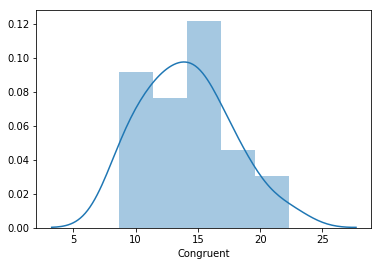

In [79]:
# Build the visualizations here

sns.distplot(df['Congruent'])

* The data is very close to normal distribution

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


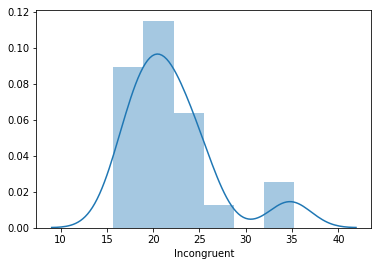

In [80]:
sns.distplot(df['Incongruent'])

* the data is two bell curve and the smaller curve make the distribution skew to right.
* the mean value for both histogram are very close to the peak

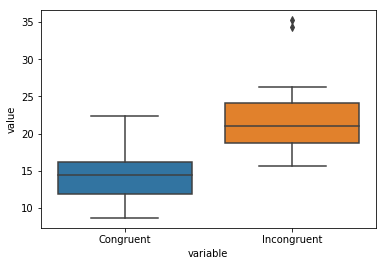

In [81]:
sns.boxplot(x='variable', y='value', data=pd.melt(df))

* the boxplot would allow us to see the difference between the congruent and incongruent groups more clearly. The population mean for incongruent group is obviously larger than the population mean of congruent group

#### Determine a confidence interval and degrees of freedom
(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? 


* set up the significance level at **$\alpha$ **=0.05
* calculate the degree of freedom df=N-1=23
* compare t statistic with  critical t value, if t_statistic is larger than critical t value, we reject the null hyphothesis
* interprete p-value, if p-value is smaller than 0.05, we reject the null hypothesis

In [83]:

# sample size 
N=24
# calculate mean of deferences
mean_diff=(df['Congruent'] - df['Incongruent']).mean()
# Calculate the standard deviation of differences
std_diff=(df['Congruent'] - df['Incongruent']).std(ddof=1)
# calculate standard errors
sed_diff=std_diff/np.sqrt(N)

# calculate t statistics
t_stat=abs(mean_diff)/sed_diff
# calculate critical t value 
# degree of freedom df=n1 +n2 -2
df=N-1
alpha=0.05
t_critical=t.ppf(1.0-alpha, df=N-1)
# calculate p-value

p= 2* (1-t.cdf((t_stat), df=N-1))  # p-value was multiplied by 2 becasue it is a two tail t-test
print('t_stat= {0:.8f}'.format(t_stat))
print('t_critical= {0:.8f}'.format(t_critical))
print('p= {0:.8f}'.format(p))

t_stat= 8.02070694
t_critical= 1.71387153
p= 0.00000004


* t_statistic is significantly larger than the critical t value, so we reject the null hypotheis
* p-value is significantly smaller than the **$\alpha$ ** value, it further proved that we reject the null hypothesis and accept the alternative hypothesis, meaning that it takes much more time to do incongruent task than it does to the congruent task. This result matches with our expectation.

#### Cross checking with the internal scipy function


In [82]:
t2, p2=stats.ttest_rel(df['Congruent'], df['Incongruent'])
print('t_stat= {0:.8f}'.format(abs(t2)))
print('p= {0:.8f}'.format(p2))

t_stat= 8.02070694
p= 0.00000004


* the result of cross checking is consistent with the result from the statistic strategy

#### References
* https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
* https://www.statsdirect.co.uk/help/parametric_methods/utt.htm
* https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html